<img height="100" src="https://i.postimg.cc/gjptBxF4/logo-gas-removebg-preview.png" width="250"/>

In [1]:
import os
from warnings import filterwarnings

import pandas as pd

filterwarnings("ignore")
path = os.path.join(os.getcwd(), 'data', "DADOS_ARTIGO_AMENDOIM.xlsx")
df = pd.read_excel(path,"Dados_finais")
df.dropna(inplace=True)
df.drop(columns=['Dia', "Rep",'DC','DG','NDJ',"P-ETP","DR","Qo","EXC","NAC","Fotop","ETR","NDH > 90%","ALT","Rajada Máxima","PAR"], inplace=True); df

C:\Users\henri\AppData\Local\Temp\ipykernel_28512\815651454.py:2: DeprecationWarning: lib2to3 package is deprecated and may not be able to parse Python 3.10+
  from lib2to3.fixes.fix_input import context


,Cultivar,Estadio,PS,TMAX,TMIN,T2M,URMAX,URMIN,UR2M,PREC,ETp,W2M,Qg,ARM,DEF,SDG
0,C1,S,942.5,31.8,22.0,24.6,94.5,48.1,81.6,0.8,4.20,2.17,16.31,24.900722,0.000000,11.6
1,C1,S,945.0,30.6,19.5,24.4,95.1,52.4,79.2,7.0,4.17,3.02,19.16,27.730722,0.000000,23.0
2,C1,S,945.1,31.3,17.0,23.8,87.3,45.2,68.6,0.0,4.07,2.56,22.86,23.991918,0.331196,33.8
3,C1,S,943.3,33.6,18.2,25.2,89.6,36.3,65.6,0.0,4.32,1.87,22.86,20.573366,0.901448,46.0
4,C1,VE,944.8,30.4,20.2,25.2,89.1,51.0,71.4,0.0,4.32,2.09,17.94,17.641915,1.388549,58.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,C22,R8,944.0,33.3,19.6,26.1,90.9,31.1,60.0,0.0,3.04,1.39,17.23,1.503642,2.868223,1932.1
10556,C22,R8,944.0,32.7,19.8,25.8,85.2,35.2,61.1,0.0,2.99,1.93,18.51,1.351880,2.838238,1944.9
10557,C22,R8,944.1,33.4,19.8,26.1,84.3,30.3,59.0,0.0,3.01,1.51,18.23,1.214571,2.872691,1958.0
10558,C22,R8,944.6,34.2,20.0,26.3,83.5,26.7,56.8,0.0,3.01,1.66,18.06,1.091208,2.886637,1971.3


In [2]:
# Selecionar a primeira ocorrência de cada estádio fenológico
df = df.drop_duplicates(subset=['Cultivar','Estadio'], keep='first')
df.drop(columns=['Cultivar'], inplace=True)
df.set_index(['Estadio'], inplace=True); df

,PS,TMAX,TMIN,T2M,URMAX,URMIN,UR2M,PREC,ETp,W2M,Qg,ARM,DEF,SDG
Estadio,,,,,,,,,,,,,,
S,942.5,31.8,22.0,24.6,94.5,48.1,81.6,0.8,4.20,2.17,16.31,24.900722,0.000000,11.6
VE,944.8,30.4,20.2,25.2,89.1,51.0,71.4,0.0,4.32,2.09,17.94,17.641915,1.388549,58.2
V0,942.3,28.4,20.4,23.0,98.5,60.0,85.7,7.0,3.95,2.75,14.12,28.103100,0.000000,81.1
V1,941.6,33.9,20.0,26.9,99.6,32.3,70.1,0.0,4.63,1.58,28.26,23.834387,0.361287,107.6
V2,943.9,32.8,20.5,25.0,95.3,40.5,77.3,1.0,4.31,2.08,18.80,16.479727,1.250079,162.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R4,937.8,30.7,19.9,23.3,96.2,49.8,83.0,3.2,3.74,1.64,19.95,21.771392,0.117619,1124.9
R5,944.6,34.1,22.1,26.6,94.3,42.0,75.3,8.0,4.04,1.65,23.23,19.238896,0.000000,1342.0
R6,943.4,29.9,20.7,24.7,95.7,56.8,78.5,0.0,3.52,3.87,11.59,19.074992,0.974723,1534.9


In [3]:
from scipy import stats
dados_pad = stats.zscore(df); dados_pad

array([[ 0.12568682, -0.41422345,  1.17178258, ...,  1.10138354,
        -1.1594339 , -1.04768844],
       [ 1.43618142, -1.06417071, -0.47817356, ...,  0.03313508,
         0.12739859, -0.96953545],
       [ 0.01173077, -1.99266679, -0.2948451 , ...,  1.57266423,
        -1.1594339 , -0.93112979],
       ...,
       [ 0.63848906, -1.29629473, -0.01985241, ...,  0.24403503,
        -0.25611317,  1.50704245],
       [-0.04524726, -0.69277228,  0.80512566, ..., -0.26967281,
         0.11672367,  1.69152377],
       [ 1.6071155 , -0.50707306,  0.71346143, ..., -1.99032121,
         1.40241783,  1.98333968]])

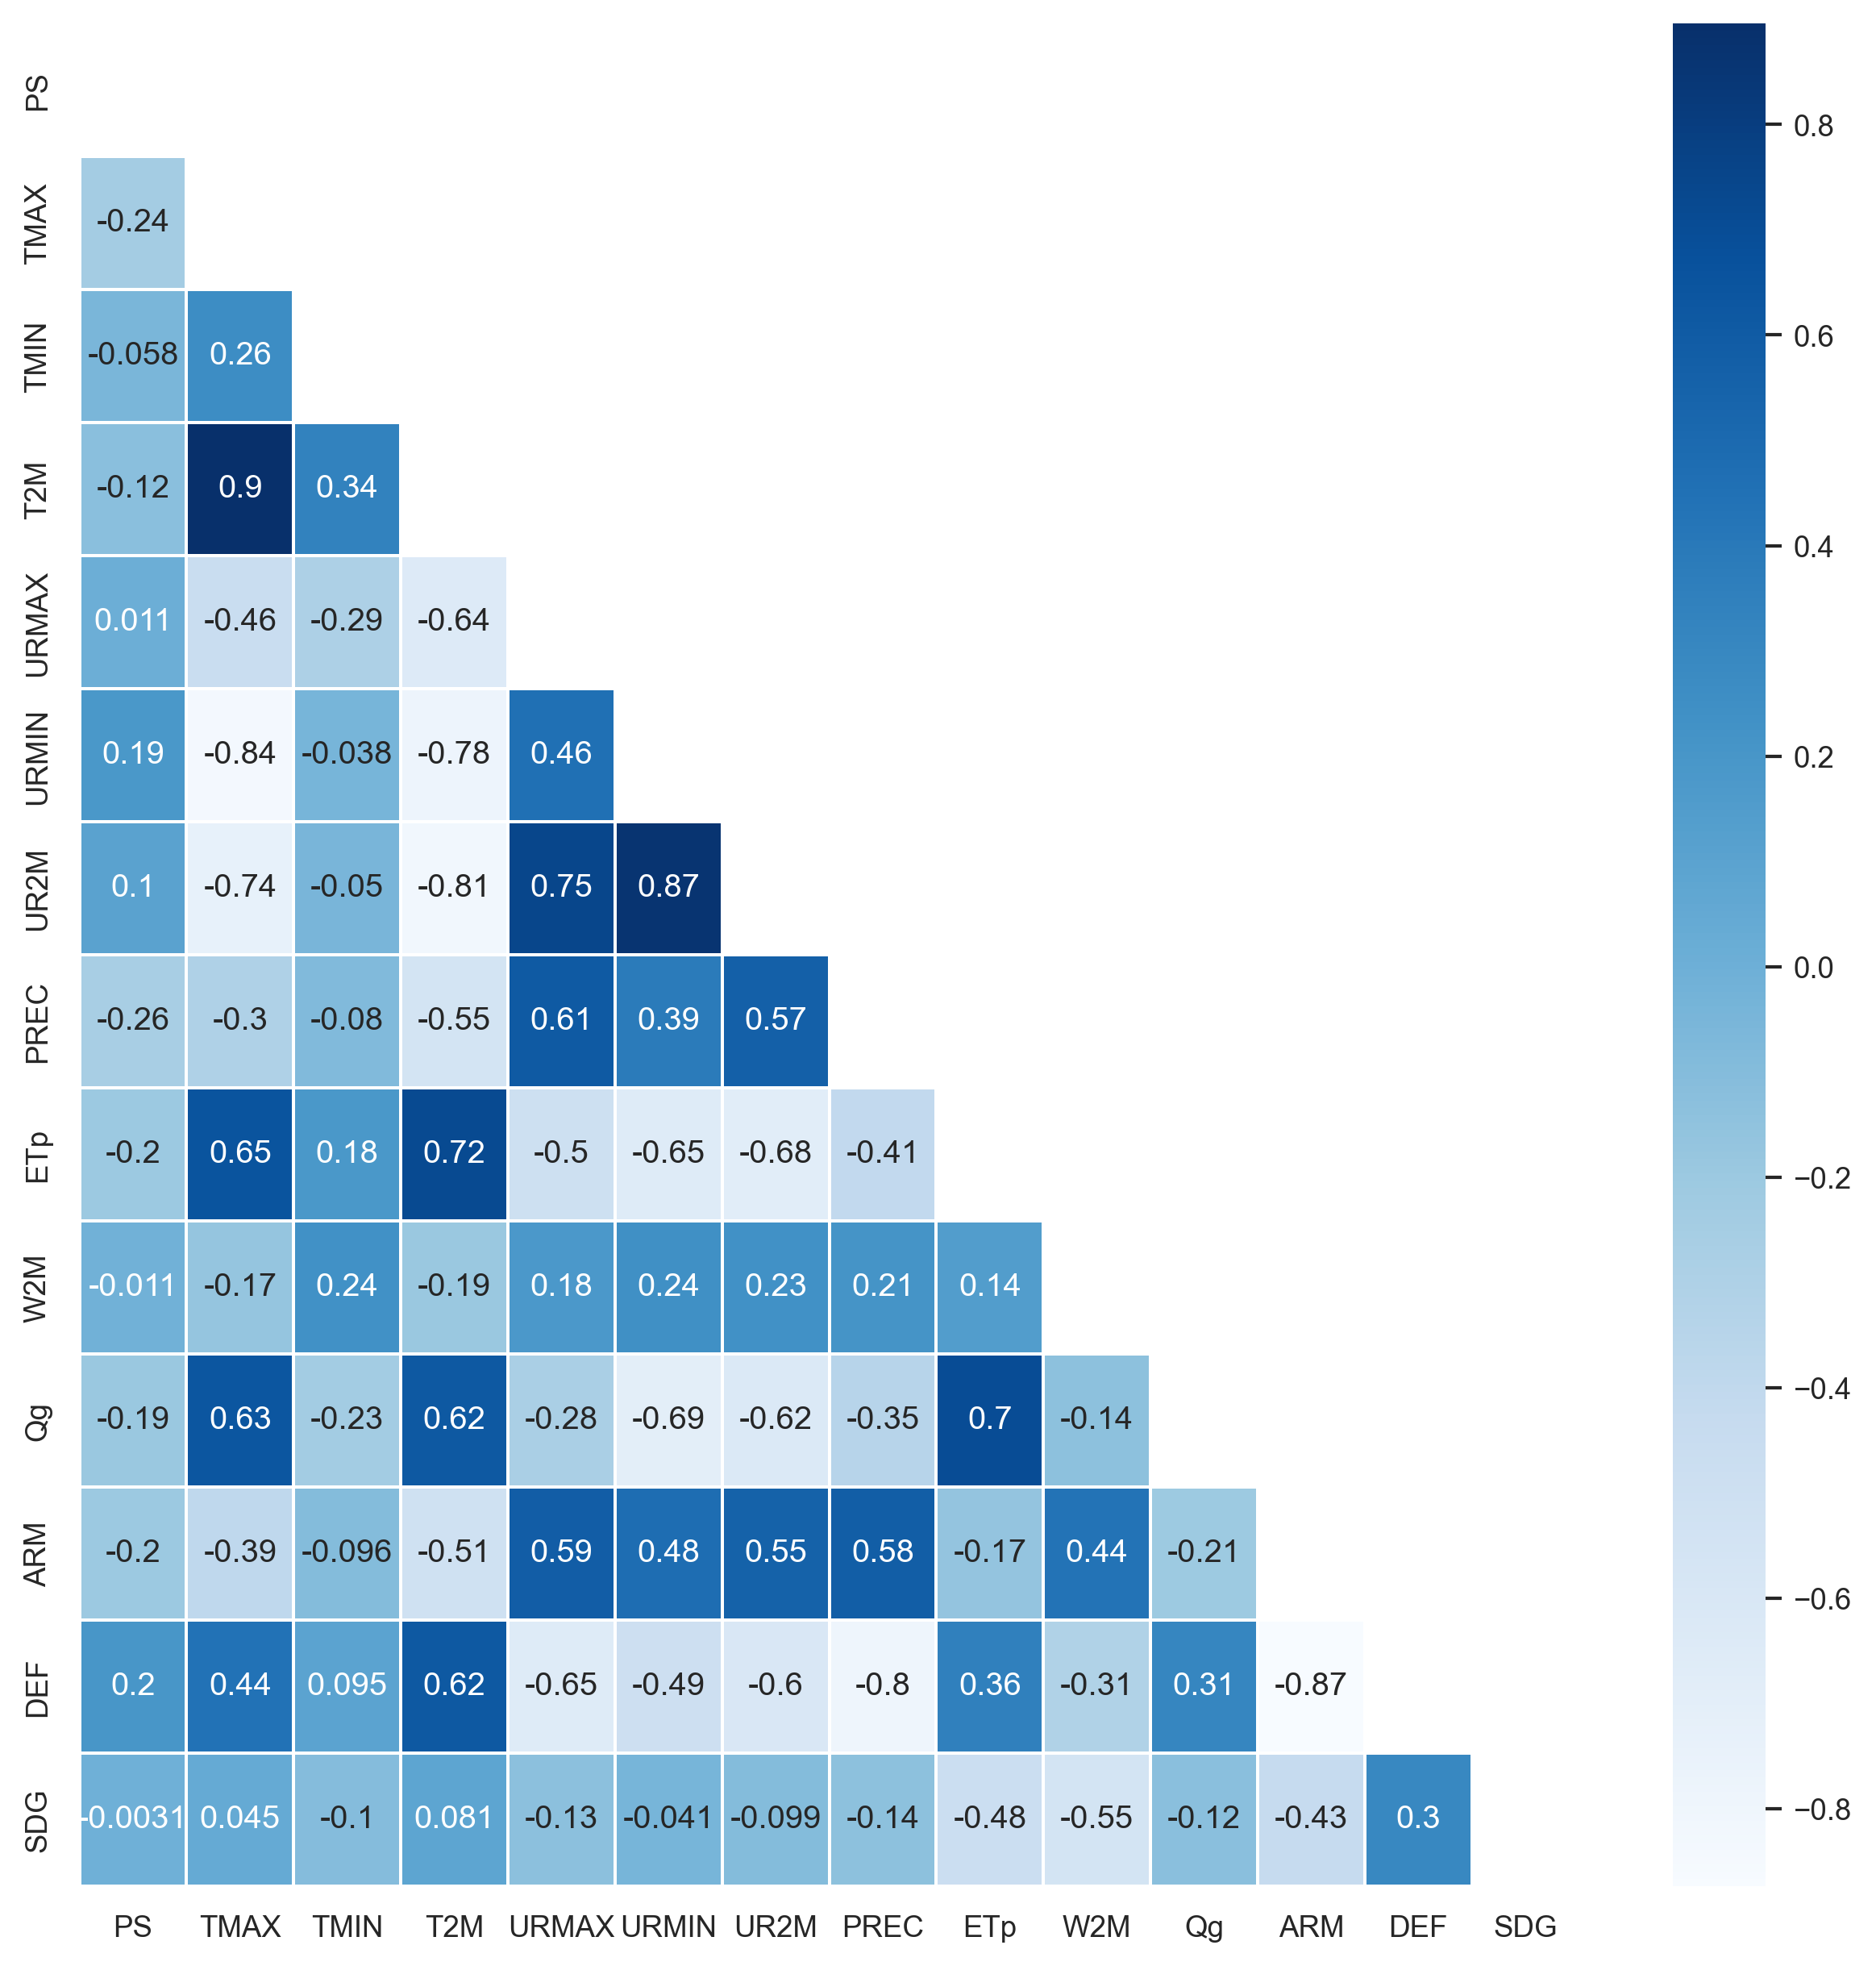

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo dados padronizados para DataFrame
dados_pad_df = pd.DataFrame(dados_pad, columns=df.columns, index=df.index)

# Calculando a matriz de correlação de Spearman
corr_matrix = dados_pad_df.corr(method='spearman')

# Criando uma máscara para a diagonal superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurando o tamanho e a resolução da figura
plt.figure(figsize=(10, 10), dpi=300)

# Plotando o heatmap com a máscara
sns.set_theme(style='white', context="paper")
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="Blues", linewidths=.9)
plt.grid(False)

# Exibindo o gráfico
plt.show()

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
x2, pvalor = calculate_bartlett_sphericity(dados_pad)

if pvalor < 0.05:
    print(f"Temos homocedasticidade das features: {pvalor}")
else:
    print(f"Não homocedastico: {pvalor}")

Temos homocedasticidade das features: 0.0


In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo, kmo_model = calculate_kmo(dados_pad)
kmo_model
#(0<= kmo <=1) --> Índice
# se KMO_model >0.05 OK podemos realizar a PCA
# autores ideal seria >0.7
# 0.6 - limite do medíocre

0.5678563835513757

In [7]:
from pca import pca

# Converter dados padronizados para DataFrame mantendo os nomes das colunas
dados_pad_df = pd.DataFrame(dados_pad, columns=df.columns, index=df.index)

# Criar e ajustar o modelo PCA
modelo = pca(n_components=2,
            alpha=0.05,
            random_state=42,
            verbose=4)
resultado = modelo.fit_transform(dados_pad_df)  # usar o DataFrame ao invés do array

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >DEBUG> Set verbose to 10
[scatterd] >DEBUG> Colors are all set to [0, 0.1, 0.4].
[scatterd] >DEBUG> Colors are based on the input [labels] and on [cmap].
[scatterd] >INFO> Add density layer


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


<Figure size 1000x1000 with 0 Axes>

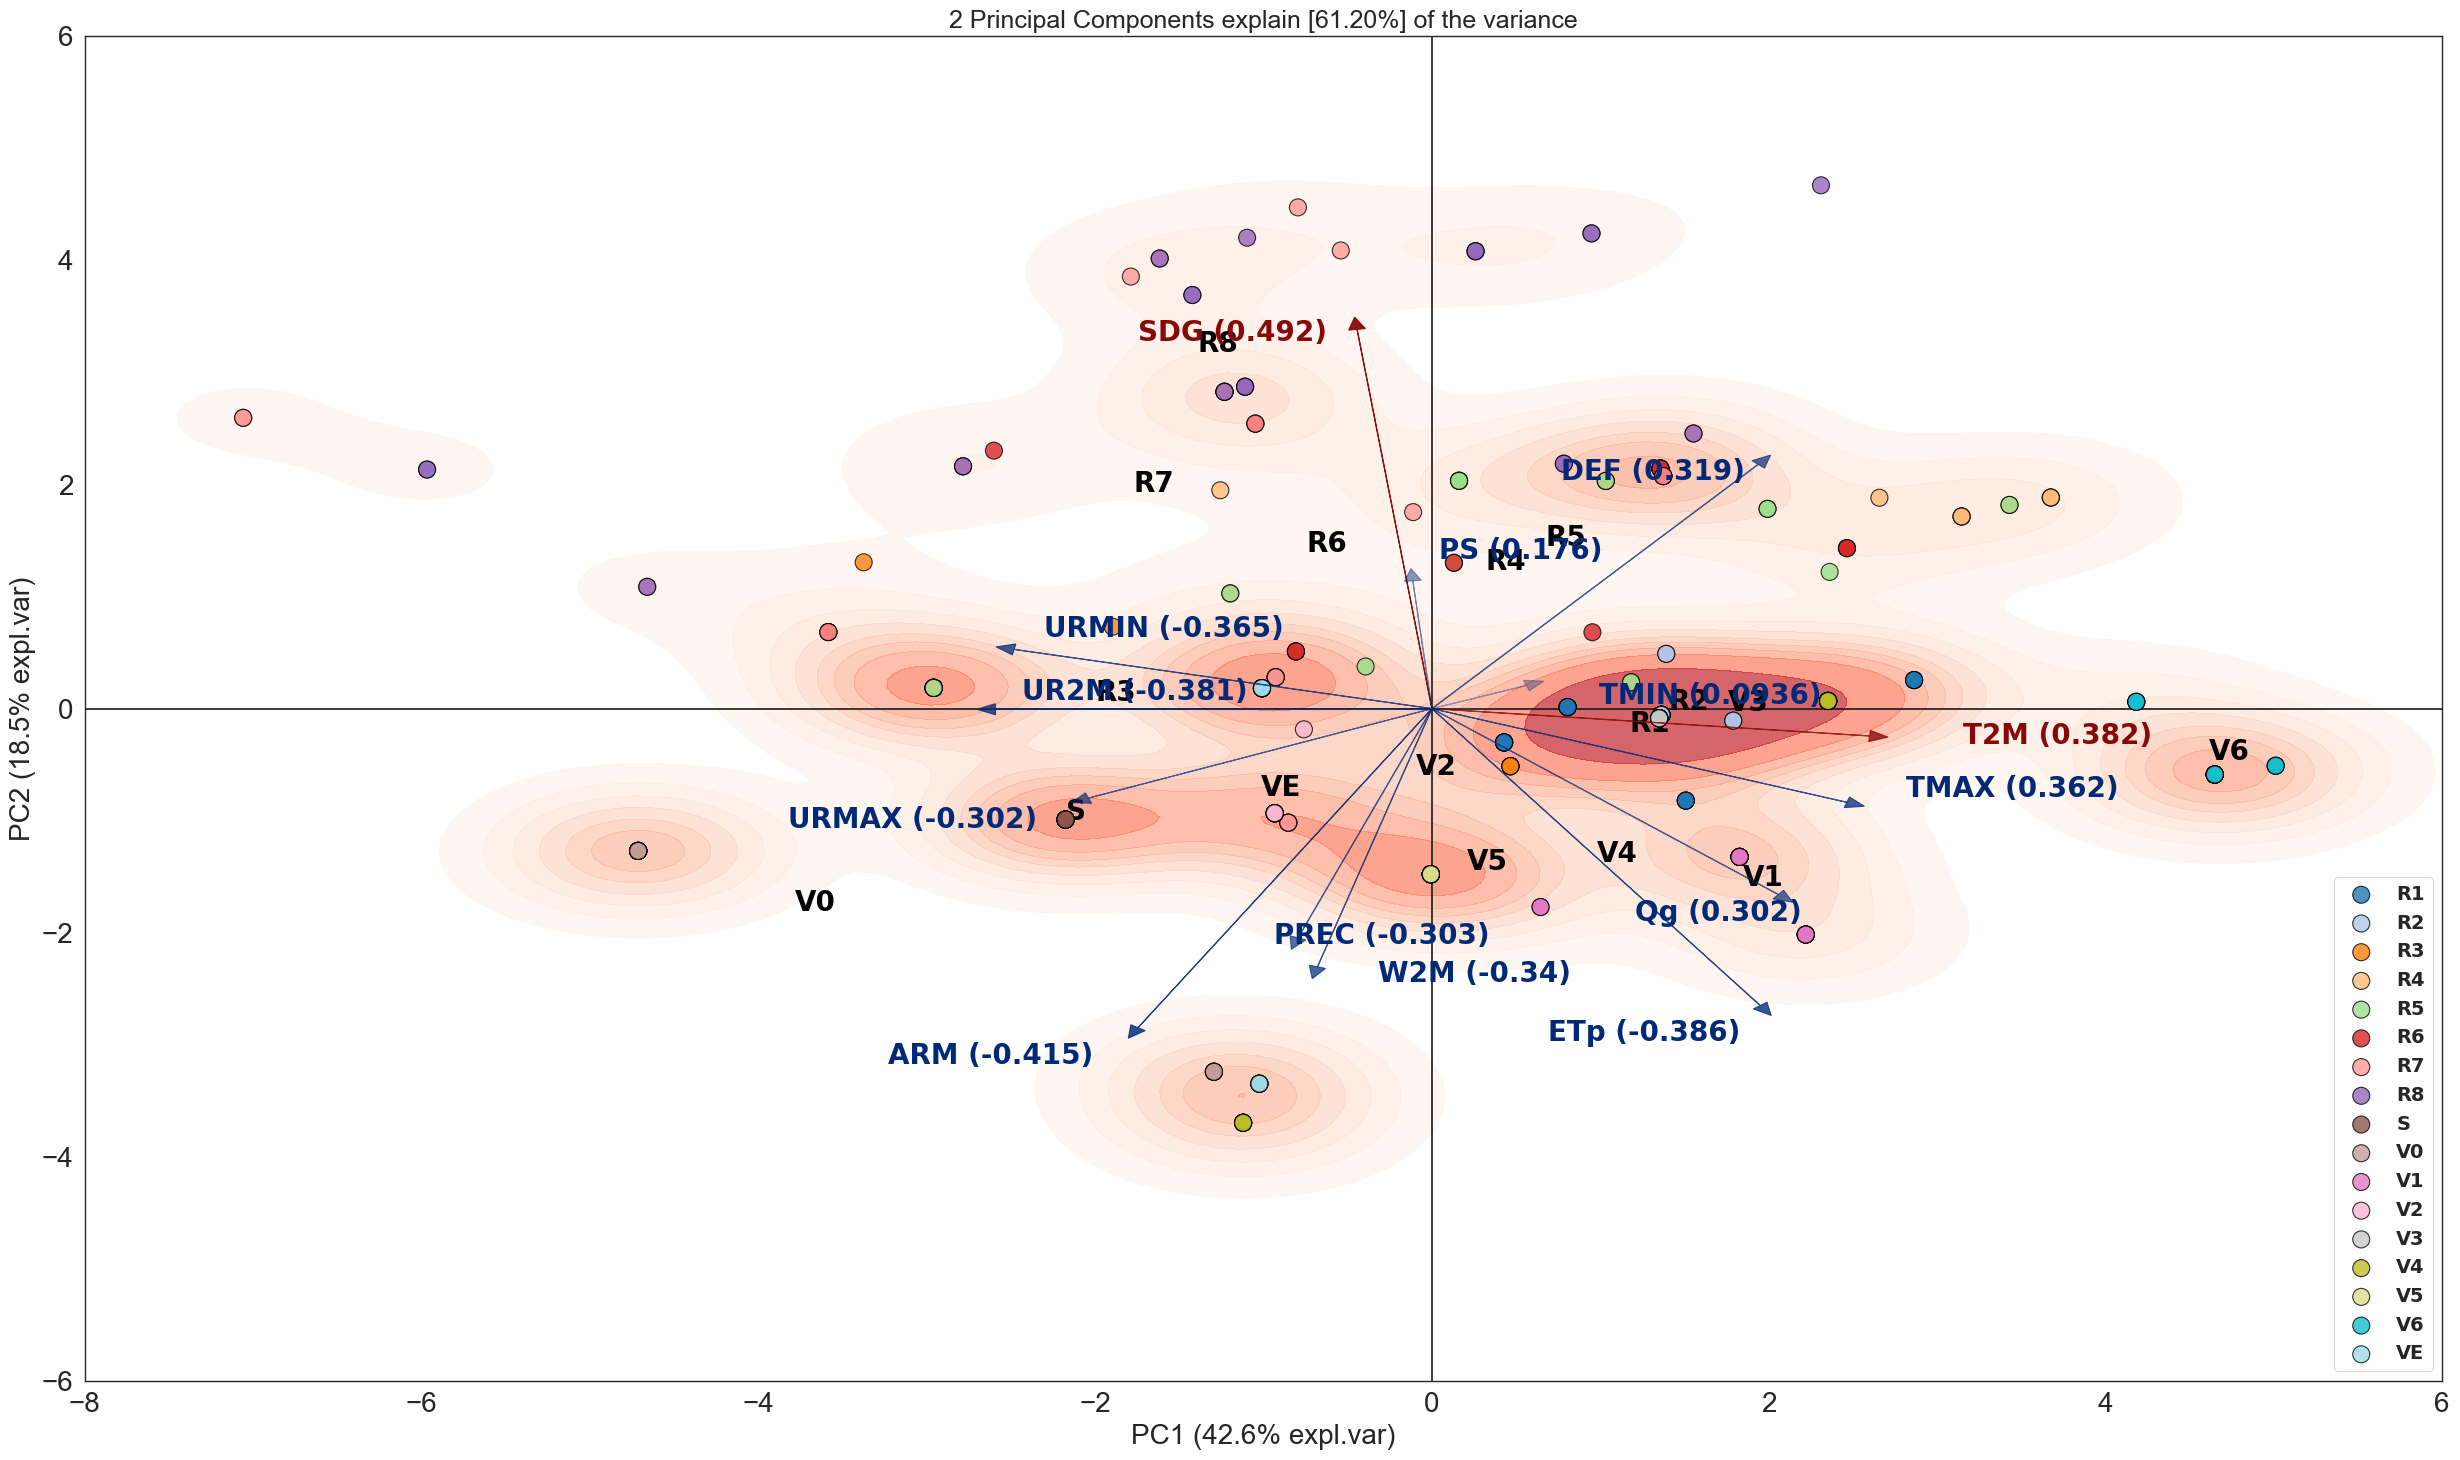

In [8]:
import matplotlib.pyplot as plt

# Definir as configurações da figura para evitar tamanhos excessivos
sns.set_theme(style="white", context="paper")
plt.figure(figsize=(10, 10))  # Ajuste o tamanho conforme necessário

# Gerar o biplot
modelo.biplot(cmap="tab20", legend=4,density=True, SPE=False, marker='o', visible=True, jitter=0, fontweight="bold",
              arrowdict={'fontsize': 20}, fontsize=20)



# Adicionar linhas centrais
plt.plot([0, 0], [-10, 10], "k-")
plt.plot([-10, 10], [0, 0], "k-")

# Definir os limites do gráfico
plt.xlim(-8, 6)
plt.ylim(-6, 6)
plt.tight_layout()

##plt.title("")
plt.grid(False)
fig_path = os.path.join(os.getcwd(), 'images', "Figure 2.jpg")
#plt.savefig(fig_path, dpi=600)

# Mostrar o gráfico
plt.show()

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 2 Principal Components explain [61.20%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

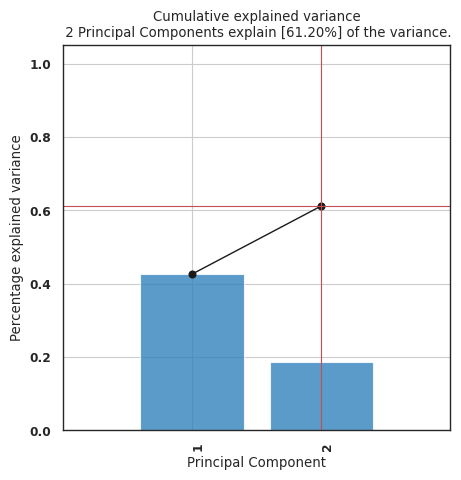

In [9]:
modelo.plot(figsize=(5,5))

In [10]:
resultado['explained_var']

array([0.42617223, 0.61201315])

In [11]:
resultado['topfeat'].round(3)

,PC,feature,loading,type
0,PC1,T2M,0.382,best
1,PC2,SDG,0.492,best
2,PC2,PS,0.176,weak
3,PC1,TMAX,0.362,weak
4,PC1,TMIN,0.094,weak
5,PC1,URMAX,-0.302,weak
6,PC1,URMIN,-0.365,weak
7,PC1,UR2M,-0.381,weak
8,PC2,PREC,-0.303,weak
9,PC2,ETp,-0.386,weak
